In [3]:
import pandas as pd
# print current directory
import os
print(os.getcwd())

/home2/s439906/project/CASP16


In [4]:
file = "./monomer/group_by_target_T0/raw/groups_by_targets_for-raw-GDT_HA-best-all.csv"
df = pd.read_csv(file, index_col=0)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec

# 示例数据
np.random.seed(0)
heatmap_data =df
sum = heatmap_data.sum(axis=1)  # 假设这是每一行的和
# mask = np.random.choice([True, False], size=heatmap_data.shape, p=[0.3, 0.7])  # 假设部分数据存在问题
mask = heatmap_data.isna()
mask

,T0206-D1,T0208s1-D1,T0208s2-D1,T0218-D1,T0218-D2,T0218-D3,T0220s1,T0227s1-D1,T0234-D1,T0235-D1,...,T0245s2-D1,T0246-D1,T0257,T0259-D1,T0270-D1,T0270-D2,T0272s2-D1,T0272s6-D1,T0272s8-D1,T0272s9-D1
TS468,False,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,False,True,True,True,True
TS301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TS380,False,False,False,True,True,True,False,True,False,True,...,False,False,True,True,False,False,False,False,False,False
TS397,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,True,True,True,True,True
TS274,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TS323,True,True,True,False,False,False,False,True,False,False,...,False,True,False,True,False,False,True,True,True,True
TS105,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,False,False,False,False,False,False
TS386,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
TS145,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True


<ipython-input-14-6b612d42cafb>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


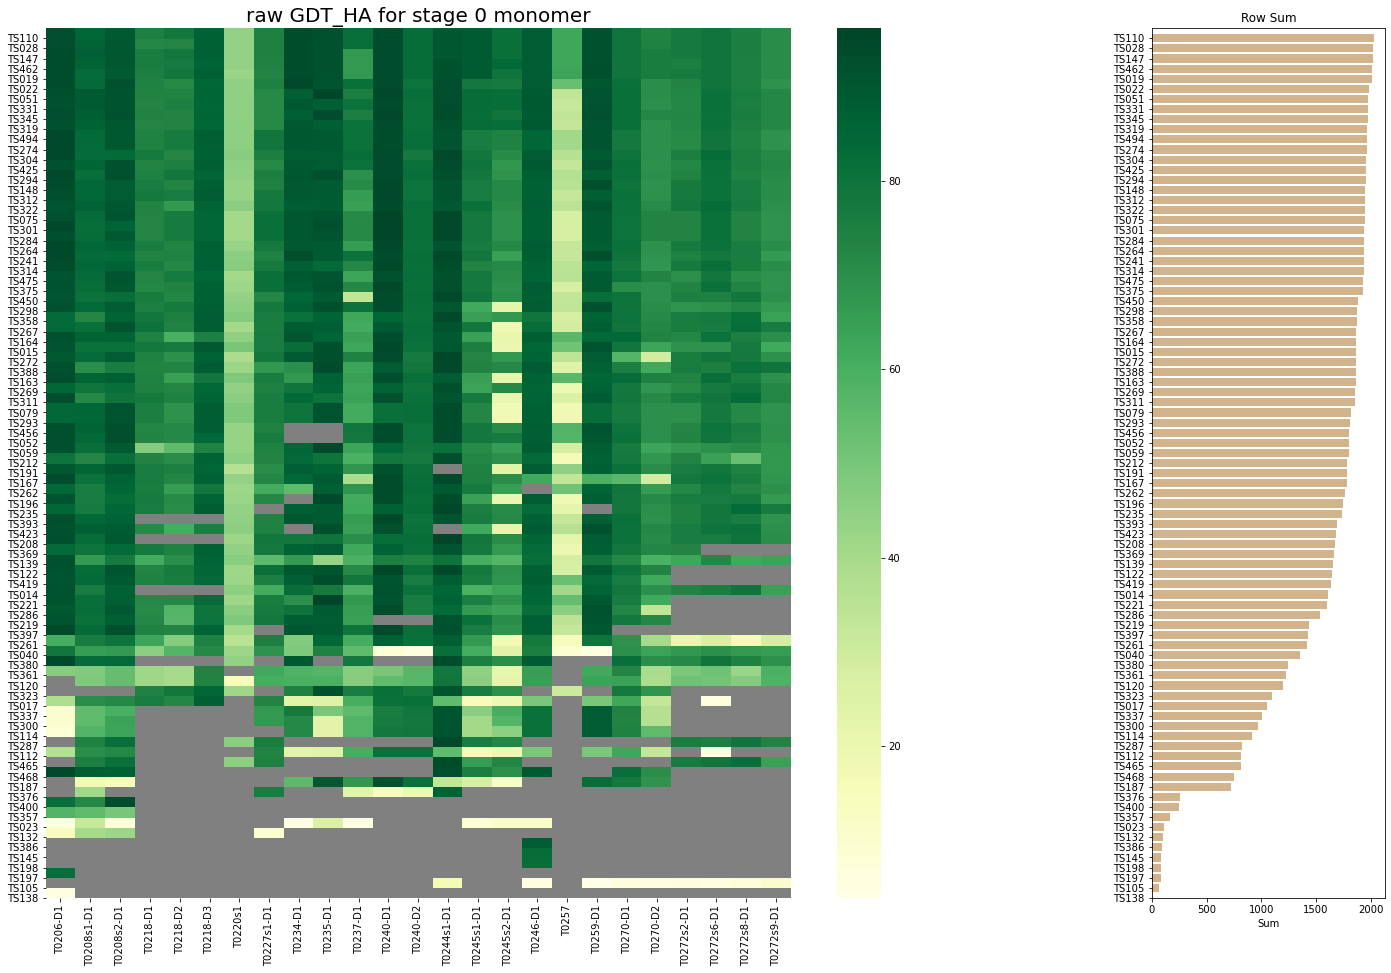

In [14]:
# 按照行和排序数据

sorted_indices = sum.sort_values(ascending=True).index
sorted_heatmap_data = heatmap_data.loc[sorted_indices].reset_index(drop=True)
sorted_sum = sum.loc[sorted_indices].reset_index(drop=True)
sorted_mask = pd.DataFrame(mask, index=heatmap_data.index).loc[sorted_indices].reset_index(drop=True)

# 使用 mask 将问题数据替换为 NaN
masked_data = sorted_heatmap_data.copy()
masked_data[sorted_mask] = np.nan

# 设置 colormap，将 NaN 显示为灰色
cmap = plt.cm.YlGn
cmap = ListedColormap(cmap(np.linspace(0, 1, 256)))
cmap.set_bad(color='gray')  # 将 NaN 设置为灰色

# 创建主图形和 gridspec
fig = plt.figure(figsize=(24, 16))
gs = GridSpec(1, 2, width_ratios=[4, 1], wspace=0.3)

# 绘制热图
ax0 = fig.add_subplot(gs[0])
sns.heatmap(masked_data, cmap=cmap, cbar=True, ax=ax0)
ax0.set_yticklabels([i for i in sorted_indices], rotation=0)  # 使用排序后的标签
ax0.set_xticklabels(sorted_heatmap_data.columns, rotation=90)
ax0.set_title("raw GDT_HA for stage 0 monomer", fontsize=20)

# 绘制右侧的条形图
ax1 = fig.add_subplot(gs[1], sharey=ax0)
ax1.barh(range(len(sorted_sum)), sorted_sum, color='tan')
ax1.set_yticks(range(len(sorted_sum)))
ax1.set_yticklabels([i for i in sorted_indices], rotation=0)  # 使用排序后的标签
ax1.invert_yaxis()  # 翻转Y轴顺序使其与热图对齐
ax1.set_xlabel("Sum")
ax1.set_title("Row Sum")

# 显示图形
plt.tight_layout()
plt.show()
